<a href="https://colab.research.google.com/github/adharangaonkar/COVID19_DataModel/blob/master/COVID19_R0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We evaluate a possible range for the infectivity, or $R_0$, of the Coronavirus Covid19. Specifically, we focus on how to extrapolate existing data from China in order to get a complete dataset that we can use for estimation.

We need to keep in mind that $R_0$ is not an absolute metric, it is one based on the virus as much as the society it infects. So different countries may experience distinct $R_0$s for the same epidemic. This notebook is a framework for estimating $R_0$ from data.

#Data from China

This website is a result of good citizenship: People posting real data that can help other people do science, learn from mistakes, and fare better.

Let's download this data, import DXYArea.csv as a pandas dataframe, and plot some interesting plots.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import files
uploaded = files.upload()


Saving DXYArea.csv to DXYArea.csv


In [0]:
covid19_china = pd.read_csv('DXYArea.csv')
covid19_china.head(20)

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
0,亚洲,Asia,约旦,Jordan,约旦,Jordan,955010,53,0.0,1,0,2020-03-19 00:31:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,亚洲,Asia,越南,Vietnam,越南,Vietnam,952011,75,0.0,16,0,2020-03-19 00:16:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,亚洲,Asia,巴基斯坦,Pakistan,巴基斯坦,Pakistan,953006,289,0.0,1,0,2020-03-19 00:12:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,北美洲,North America,古巴,Cuba,古巴,Cuba,974004,10,0.0,0,1,2020-03-19 00:09:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,亚洲,Asia,巴勒斯坦,Palestine,巴勒斯坦,Palestine,955014,44,0.0,0,0,2020-03-19 00:05:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,欧洲,Europe,西班牙,Spain,西班牙,Spain,965015,13716,0.0,1081,598,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,欧洲,Europe,德国,Germany,德国,Germany,963003,11312,0.0,135,26,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,亚洲,Asia,伊朗,Iran,伊朗,Iran,955007,17361,0.0,5710,1135,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,北美洲,North America,美国,United States of America,美国,United States of America,971002,7111,0.0,74,117,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,亚洲,Asia,韩国,Korea,韩国,Korea,951004,8413,0.0,1540,84,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will drop the columns which do not have any significance with our study

In [0]:
covid19_china.drop(['province_suspectedCount', 'city_suspectedCount', 'province_zipCode', 'city_zipCode'], axis=1, inplace=True)
covid19_china.head(20)

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_confirmedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_confirmedCount,city_curedCount,city_deadCount
0,亚洲,Asia,约旦,Jordan,约旦,Jordan,53,1,0,2020-03-19 00:31:40,NaN,NaN,NaN,NaN,NaN
1,亚洲,Asia,越南,Vietnam,越南,Vietnam,75,16,0,2020-03-19 00:16:32,NaN,NaN,NaN,NaN,NaN
2,亚洲,Asia,巴基斯坦,Pakistan,巴基斯坦,Pakistan,289,1,0,2020-03-19 00:12:14,NaN,NaN,NaN,NaN,NaN
3,北美洲,North America,古巴,Cuba,古巴,Cuba,10,0,1,2020-03-19 00:09:02,NaN,NaN,NaN,NaN,NaN
4,亚洲,Asia,巴勒斯坦,Palestine,巴勒斯坦,Palestine,44,0,0,2020-03-19 00:05:48,NaN,NaN,NaN,NaN,NaN
5,欧洲,Europe,西班牙,Spain,西班牙,Spain,13716,1081,598,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN
6,欧洲,Europe,德国,Germany,德国,Germany,11312,135,26,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN
7,亚洲,Asia,伊朗,Iran,伊朗,Iran,17361,5710,1135,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN
8,北美洲,North America,美国,United States of America,美国,United States of America,7111,74,117,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN
9,亚洲,Asia,韩国,Korea,韩国,Korea,8413,1540,84,2020-03-19 00:00:24,NaN,NaN,NaN,NaN,NaN


In [0]:
len(covid19_china)

83827

In [0]:
covid19_china = covid19_china[covid19_china['countryEnglishName'] == 'China']
len(covid19_china)

71717

In [0]:
covid19_china.head(20)

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_confirmedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_confirmedCount,city_curedCount,city_deadCount
149,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,武汉,Wuhan,50005.0,40073.0,2490.0
150,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,孝感,Xiaogan,3518.0,3297.0,128.0
151,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,鄂州,Ezhou,1394.0,1290.0,57.0
152,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,随州,Suizhou,1307.0,1222.0,45.0
153,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,荆州,Jingzhou,1580.0,1499.0,50.0
154,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,荆门,Jingmen,928.0,870.0,39.0
155,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,十堰,Shiyan,672.0,645.0,8.0
156,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,仙桃,Xiantao,575.0,535.0,22.0
157,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,黄石,Huangshi,1015.0,963.0,38.0
158,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,宜昌,Yichang,931.0,881.0,36.0


Data Cleaning by dropping the Nan values



In [0]:
covid19_china = covid19_china.dropna()

In [0]:

len(covid19_china)

69707

Get all the city names

In [0]:
china_cities = covid19_china['cityEnglishName'].values
china_cities

array(['Wuhan', 'Xiaogan', 'Ezhou', ..., 'Changchun', 'Shijiazhuang',
       'Yinchuan'], dtype=object)

We will primarily look for the city of Wuhan as it was the epicenter of the Pandemic

We will also set the index to be the update time of the observation

In [0]:
covid19_wuhan = covid19_china[covid19_china["cityEnglishName"] == "Wuhan"]
covid19_wuhan

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_confirmedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_confirmedCount,city_curedCount,city_deadCount
149,亚洲,Asia,中国,China,湖北省,Hubei,67800,56927,3122,2020-03-18 22:16:04,武汉,Wuhan,50005.0,40073.0,2490.0
478,亚洲,Asia,中国,China,湖北省,Hubei,67800,56886,3122,2020-03-18 12:12:22,武汉,Wuhan,50005.0,40032.0,2490.0
497,亚洲,Asia,中国,China,湖北省,Hubei,67800,56885,3122,2020-03-18 12:11:15,武汉,Wuhan,50005.0,40032.0,2490.0
1325,亚洲,Asia,中国,China,湖北省,Hubei,67800,56883,3122,2020-03-18 09:19:13,武汉,Wuhan,50004.0,39220.0,2480.0
2095,亚洲,Asia,中国,China,湖北省,Hubei,67799,56003,3111,2020-03-17 19:47:01,武汉,Wuhan,50004.0,39220.0,2480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83125,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,2020-01-24 11:49:48,武汉,Wuhan,495.0,0.0,0.0
83382,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,2020-01-24 09:50:40,武汉,Wuhan,495.0,0.0,0.0
83390,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,2020-01-24 09:49:39,武汉,Wuhan,495.0,0.0,0.0
83396,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,2020-01-24 09:48:39,武汉,Wuhan,495.0,0.0,0.0


In [0]:
latest_wuhan = covid19_wuhan.sort_values('updateTime')
latest_wuhan = latest_wuhan.set_index('updateTime')
latest_wuhan

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_confirmedCount,province_curedCount,province_deadCount,cityName,cityEnglishName,city_confirmedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,,,,,
2020-01-24 09:47:38,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
2020-01-24 09:48:39,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
2020-01-24 09:49:39,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
2020-01-24 09:50:40,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
2020-01-24 11:49:48,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-17 19:47:01,亚洲,Asia,中国,China,湖北省,Hubei,67799,56003,3111,武汉,Wuhan,50004.0,39220.0,2480.0
2020-03-18 09:19:13,亚洲,Asia,中国,China,湖北省,Hubei,67800,56883,3122,武汉,Wuhan,50004.0,39220.0,2480.0
2020-03-18 12:11:15,亚洲,Asia,中国,China,湖北省,Hubei,67800,56885,3122,武汉,Wuhan,50005.0,40032.0,2490.0


In [0]:
latest_wuhan = covid19_wuhan.sort_values('updateTime')
latest_wuhan = latest_wuhan.set_index('updateTime')
latest_wuhan

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_confirmedCount,province_curedCount,province_deadCount,cityName,cityEnglishName,city_confirmedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,,,,,
2020-01-24 09:47:38,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
2020-01-24 09:48:39,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
2020-01-24 09:49:39,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
2020-01-24 09:50:40,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
2020-01-24 11:49:48,亚洲,Asia,中国,China,湖北省,Hubei,549,0,0,武汉,Wuhan,495.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-17 19:47:01,亚洲,Asia,中国,China,湖北省,Hubei,67799,56003,3111,武汉,Wuhan,50004.0,39220.0,2480.0
2020-03-18 09:19:13,亚洲,Asia,中国,China,湖北省,Hubei,67800,56883,3122,武汉,Wuhan,50004.0,39220.0,2480.0
2020-03-18 12:11:15,亚洲,Asia,中国,China,湖北省,Hubei,67800,56885,3122,武汉,Wuhan,50005.0,40032.0,2490.0


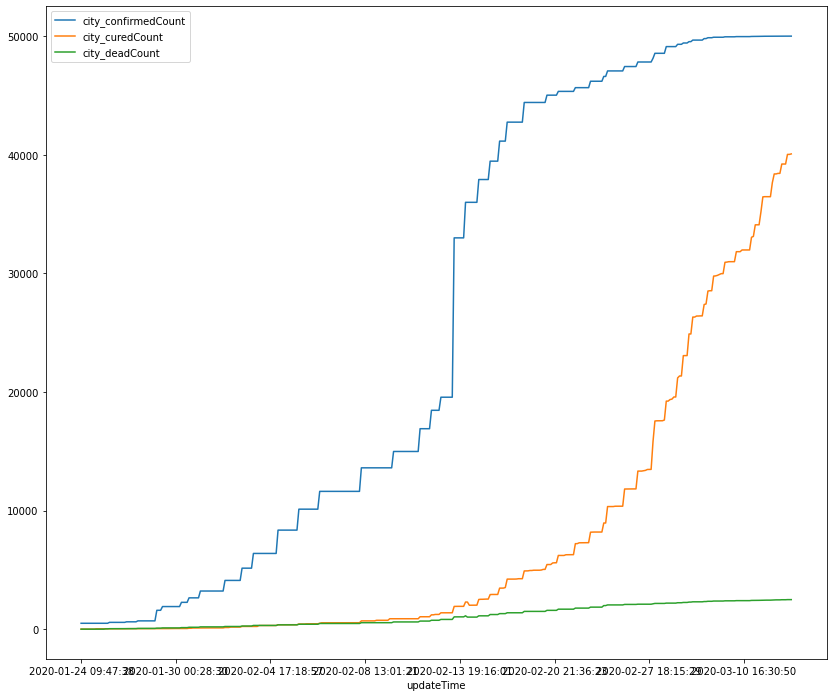

<Figure size 800x1600 with 0 Axes>

In [0]:
import seaborn as sns
plt.figure(figsize=(14,12))
ax = plt.gca()
plt.figure(num=None, figsize=(10, 20), dpi=80, facecolor='w', edgecolor='k')
latest_wuhan.plot(kind='line',  y='city_confirmedCount', ax=ax)
latest_wuhan.plot(kind='line',  y='city_curedCount', ax=ax)
latest_wuhan.plot(kind='line',  y='city_deadCount', ax=ax)

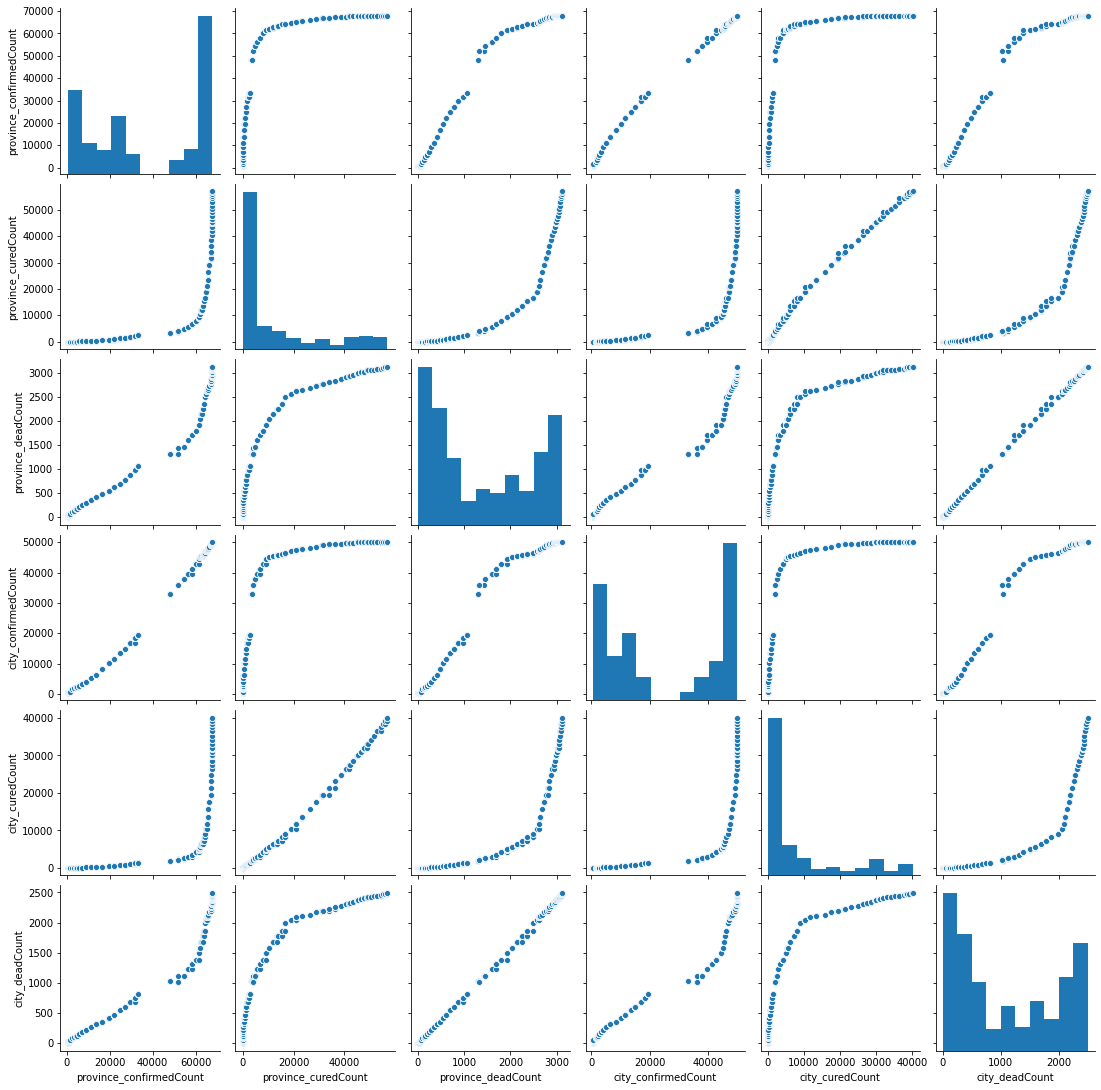

In [0]:
sns.pairplot(latest_wuhan)

#Our model for Infection

In [0]:
pip install pymc3[plots]

     |████████████████████████████████| 1.5MB 4.6MB/s 
     |████████████████████████████████| 4.1MB 21.3MB/s 
     |████████████████████████████████| 327kB 39.4MB/s 


In [0]:
!pip install arviz

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

# Acquired immunity controls the infection

The Susceptible-Infected-Recovered model of infection describes time dynamics of an infectious disease spreading through a homogenous closed population (no births or deaths). The population is divided into three categories: ***Susceptible S***, ***Infective I***, or ***Recovered/Dead R***. We can further refine our model by having a different category D for dead, but let's keep it simple for now and include dead people as recovered. When people die, if properly buried, they cannot infect anymore and so they are equivalent to people that have recovered and are immune to the infection.

Susceptible individuals are those that have not acquired immunity yet and are susceptible to becoming infected.

Infected individuals have been infected with the disease.

Recovered individuals are cured and not susceptible anymore to the disease.

## SIR Model of Infections

Differential equations are a mathematical framework for modelling temporal dynamics of a system. The differential equations for the SIR model of infection are:

$$\dfrac{dS}{dt} = - \beta SI \quad S(0) = S_0$$$$\dfrac{dI}{dt} = \beta SI - \gamma I \quad I(0) = I_0$$$$\dfrac{dR}{dt} = \gamma I \quad R(0) = R_0$$
With the constraint that:

$$S(t) + I(t) + R(t) = 1 \;\;, \forall t$$
Other models are available for modeling infectious diseases, such as the IBM model.

If we know R(t) and I(t) then we can determine S(t): $S(t) = 1 - I(t) - R(t)$, so we can work only with the two unknowns: R(t) and I(t). We prefer to work with these because that is what the China Covid19 dataset gives us!

So we write:

$$\dfrac{dI}{dt} = \beta (1 - I - R) I - \gamma I \quad I(0) = I_0$$$$\dfrac{dR}{dt} = \gamma I \quad R(0) = R_0$$
Simplifying:

$$\dfrac{dI}{dt} = \beta (1 - I - R -\gamma/\beta) I  \quad I(0) = I_0$$$$\dfrac{dR}{dt} = \gamma I \quad R(0) = R_0$$
We have two equations in two unknowns, so we're good mathematicaly speaking. What are the parameters?


[Compartmental models in epidemiology](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology)


[SIR Model](https://https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model)


$\beta$  is the rate of infection per susceptible and per infective individual: $\beta$ is an average infected to non-infected individual contact (e.g. 4 individuals) and hinges on the underlying society. Arguably, it is higher in China where the population is denser. But it also high in very social Mediterranean countries like Italy and Spain. $\gamma$ is the rate of recovery: It can be interpreted as an average period of infectiousness (e.g. 3 to 5 days for the common flu). For Covid19, experts are astonished by how long an individual can infect others and say that it can be up to 30 days!






>For an example, in the Hong Kong flu in New York City in the late 1960's, hardly anyone was immune at the beginning of the epidemic, so almost everyone was susceptible. [This](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model) paper gives an estimate for the parameters. Assuming a trace level of infection in the population, say, 10 people, population variables are S(0) = 7,900,000, I(0) = 10, R(0) = 0. In terms of scaled variables, these initial conditions are s(0) = 1, i(0) = 1.27 x 10-6, r(0) = 0. We don't know values for the parameters  𝛽  and  𝛾  yet, but they can be estimated and then adjusted as necessary to fit the excess death data. The average period of infectiousness is estimated at three days, so that would suggest  𝛾=1/3 . Guessing that each infected individual would make a possibly infecting contact with another individual every two days, then  𝛽  would be  1/2 . So  𝛽/𝛾=3/2>1 .






The quantity  β/γ  is called **R-Nought ( 𝑅0 )**. Its interpretation is that if we were to drop a single infected person into a population of suceptible individuals, we would expect  𝑅0  new infections. If  𝑅0>1 , then an epidemic will take place. If  𝑅0≤1  then there will be no epidemic.

>When  𝑅0<1 , each person who contracts the disease will infect fewer than one person before dying or recovering, so the outbreak will fizzle ( 𝑑𝐼/𝑑𝑡<0 ). When  𝑅0>1 , each person who gets the disease will infect more than one person, so the epidemic will spread ( 𝑑𝐼/𝑑𝑡>0 ).  𝑅0  is the most important quantity in epidemiology.

Let's model our SIR equations using a python function. y is our unknown, it's 2D:  𝑦[0]=𝐼  and  𝑦[1]=𝑅 . . The parameters p are 2D:  𝑝[0]=𝛽  and  𝑝[1]=𝛾 

In accordance with the odeint package of the scipy.integrate library for integrating (solving) ordinary differential equations, we'll write our SIR function thusly, assuming that the constant time step dt is equal to 1.

In [0]:
def SIR(y, t, p):
    di = p[0] * (1. - y[0] - y[1] - p[1]/p[0]) * y[0]
    dr = p[1] * y[0]
    return [di, dr]

In [0]:
def susceptible(i, r):
    s=[]
    for x in range (len(i)):
            s.append(1-i[x]-r[x])
    return s

This will be our time discretization:

In [0]:
times = np.arange(0, 5, 0.25)

Let's compute *exact* values for `y` (y\[0\] = I and y\[1\] = R). Let's assume that I(0) = 0.01 and R(0) = 0. In other words, we start with 1% infected individuals in the population, 0 recovered, and so 1 - 0.01 - 0 = 99% susceptible individuals.

Let's pick some values for $\beta$ and $\gamma$ to begin with (we will model them based on China's data leter on), which guarantee an epidemic ($\beta > \gamma$):

In [0]:
beta, gamma = 4.0, 1.0

Realistically, an individual may be in infectious contact with more than 4 other individuals per day, and Covid19's infectivity is much bigger than 1 day!

We use the library `odeint` from the package `scipy.integrate` to solve the ordinary differential equations for SIR:

In [0]:
from scipy.integrate import odeint

# Compute true curves
y = odeint(SIR, t=times, y0=[0.01, 0.0], args=((beta, gamma),), rtol=1e-8)

In [0]:
y

array([[0.01      , 0.        ],
       [0.0208257 , 0.00369366],
       [0.04246544, 0.01130492],
       [0.083082  , 0.02650486],
       [0.15079362, 0.05513194],
       [0.24292884, 0.10400761],
       [0.3349354 , 0.17661942],
       [0.3933139 , 0.26860411],
       [0.40470816, 0.36928649],
       [0.37975604, 0.46791413],
       [0.3359828 , 0.55761153],
       [0.28660856, 0.63545595],
       [0.23898306, 0.70107272],
       [0.19638616, 0.75537256],
       [0.15983607, 0.79977261],
       [0.12923981, 0.83578799],
       [0.10402352, 0.86484124],
       [0.08345368, 0.88818694],
       [0.06679166, 0.90689355],
       [0.05336167, 0.92185186]])

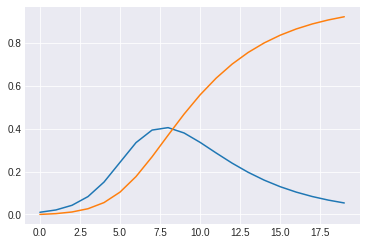

In [0]:
plt.plot(y)

The data has uncertainty (or ***noise***) because of our measurement tools ([aleatoric uncertainty](https://en.wikipedia.org/wiki/Uncertainty_quantification)), but also because the modeling equations are not perfect ([epistemic uncertainity](https://en.wikipedia.org/wiki/Uncertainty_quantification)).

We pick a [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution), a continuous probability distribution whose logarithm is *normally distributed* (thus, if the random variable X is log-normally distributed, then Y = ln(X) has a normal distribution) as our observations pdf, with a mean equal to the log of `y`. 

>**NOTE**: Recall that taking the logarithm of a histogram of a dataset makes the histogram look much prettier, i.e. closer to a normal distribution, so that we can indeed model it as a normal distribution. So this is a very common operation amongst data scientists.

So, these are our observations: Data from the true curves for I and R with errors 10% and 10% respectively

In [0]:
yobs = np.random.lognormal(mean=np.log(y[1::]), sigma=[0.1, 0.1])
yobs

array([[0.02161774, 0.00324951],
       [0.03963702, 0.00932461],
       [0.09710907, 0.02129597],
       [0.15366279, 0.05654982],
       [0.25723596, 0.09593477],
       [0.32535953, 0.21208217],
       [0.36419005, 0.31061219],
       [0.35313518, 0.38749328],
       [0.36286375, 0.54599922],
       [0.27419728, 0.63284941],
       [0.27070699, 0.60663462],
       [0.29593743, 0.75683061],
       [0.17609697, 0.75529291],
       [0.1831887 , 0.7813003 ],
       [0.14616133, 0.89088405],
       [0.10561567, 0.73525457],
       [0.08914503, 0.91357363],
       [0.07165753, 0.9687763 ],
       [0.05229353, 0.76492974]])

Now plotting our observations as datapoints on top of the exact values for S and I. R is not observed but estimated from the exact curves for S and I. Plotting that, too.

In [0]:
i_ = [i[0] for i in yobs]
r_= [i[1] for i in yobs]

In [0]:
i_

[0.02161774415976557,
 0.03963702128806664,
 0.09710906547550173,
 0.15366278988954366,
 0.2572359577029466,
 0.3253595304992386,
 0.3641900540553766,
 0.3531351796182289,
 0.3628637518076677,
 0.2741972766144228,
 0.2707069925003338,
 0.2959374275251839,
 0.1760969671313069,
 0.18318870100166118,
 0.14616133358781044,
 0.10561567052884462,
 0.08914503372872927,
 0.07165752732445275,
 0.052293533637485554]

In [0]:
r_

[0.0032495067902823167,
 0.009324614166238159,
 0.021295970328599024,
 0.056549818633569095,
 0.09593477161346815,
 0.2120821705079677,
 0.3106121949318205,
 0.38749328143089107,
 0.5459992221714639,
 0.632849413537535,
 0.6066346184325447,
 0.7568306057320422,
 0.7552929052290758,
 0.7813002989063264,
 0.8908840486813929,
 0.7352545726538587,
 0.9135736268053231,
 0.9687762984841175,
 0.7649297360850856]

In [0]:
s = susceptible(i_ ,r_)
s

[0.9751327490499521,
 0.9510383645456951,
 0.8815949641958993,
 0.7897873914768873,
 0.6468292706835852,
 0.46255829899279366,
 0.32519775101280285,
 0.25937153895088,
 0.09113702602086837,
 0.09295330984804229,
 0.12265838906712145,
 -0.05276803325722612,
 0.06861012763961738,
 0.03551100009201247,
 -0.0370453822692034,
 0.15912975681729669,
 -0.0027186605340523418,
 -0.040433825808570245,
 0.1827767302774288]

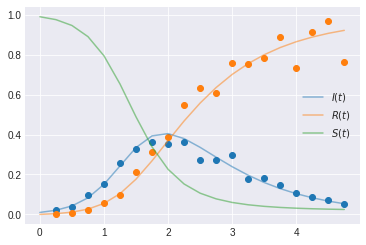

In [0]:
plt.plot(times[1::],yobs, marker='o', linestyle='none')
plt.plot(times, y[:,0], color='C0', alpha=0.5, label=f'$I(t)$')
plt.plot(times, y[:,1], color ='C1', alpha=0.5, label=f'$R(t)$')
plt.plot(times, susceptible(y[:,0], y[:,1]), color ='C2', alpha=0.5, label=f'$S(t)$')
plt.legend()


Driven by rising infections, susceptible population diminishes due to acquired immunity, which controls the infection and brings it down to zero after it reaches a peak of 40% of the population, for the values of the parameters $\beta$ and $\gamma$ that we picked. Very sobering.

Our China data though is only up to timepoint 2 in the graph above. We have yet to observe the infection to come down. All we observe in China is that the number of new infections is coming down to almost zero, which means we are approaching the peak of the Infected curve $I(t)$.



## Modeling with China's data

Let's model China's infection data with Bayesian estimation in order to figure out the critical Chinese  𝛽  and  𝛾  parameters. Based on social comparisons, we can estimate our own  𝛽  parameter, so that will give us a disease  𝑅0 , which will tell us how dangerous Covid19 really is.



Let's see how much more dangerous than the flu it really is.

Let's plot Wuhan's infected and cured populations once again:

In [0]:
wuhan_current=latest_wuhan[['city_confirmedCount', 'city_curedCount', 'city_deadCount']]
wuhan_current

,city_confirmedCount,city_curedCount,city_deadCount
updateTime,,,
2020-01-24 09:47:38,495.0,0.0,0.0
2020-01-24 09:48:39,495.0,0.0,0.0
2020-01-24 09:49:39,495.0,0.0,0.0
2020-01-24 09:50:40,495.0,0.0,0.0
2020-01-24 11:49:48,495.0,0.0,0.0
...,...,...,...
2020-03-17 19:47:01,50004.0,39220.0,2480.0
2020-03-18 09:19:13,50004.0,39220.0,2480.0
2020-03-18 12:11:15,50005.0,40032.0,2490.0


In [0]:
wuhan_current['city_recoveredCount'] =wuhan_current.loc[:,['city_curedCount', 'city_deadCount']].sum(axis=1)
wuhan_current

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,city_confirmedCount,city_curedCount,city_deadCount,city_recoveredCount
updateTime,,,,
2020-01-24 09:47:38,495.0,0.0,0.0,0.0
2020-01-24 09:48:39,495.0,0.0,0.0,0.0
2020-01-24 09:49:39,495.0,0.0,0.0,0.0
2020-01-24 09:50:40,495.0,0.0,0.0,0.0
2020-01-24 11:49:48,495.0,0.0,0.0,0.0
...,...,...,...,...
2020-03-17 19:47:01,50004.0,39220.0,2480.0,41700.0
2020-03-18 09:19:13,50004.0,39220.0,2480.0,41700.0
2020-03-18 12:11:15,50005.0,40032.0,2490.0,42522.0


In [0]:
city_confirCount = wuhan_current.city_confirmedCount.to_numpy()

Mirroring the current confirmed count hoping that the government data is correct

In [0]:
aa = wuhan_current.city_confirmedCount.to_list()
aa
def Reverse(lst): 
    lst.reverse() 
    return lst 

rev = Reverse(aa)
rev

[50005.0,
 50005.0,
 50005.0,
 50004.0,
 50004.0,
 50004.0,
 50003.0,
 50003.0,
 50003.0,
 50003.0,
 49999.0,
 49995.0,
 49995.0,
 49995.0,
 49995.0,
 49995.0,
 49991.0,
 49986.0,
 49986.0,
 49986.0,
 49978.0,
 49978.0,
 49965.0,
 49965.0,
 49965.0,
 49965.0,
 49965.0,
 49965.0,
 49965.0,
 49965.0,
 49948.0,
 49948.0,
 49948.0,
 49948.0,
 49948.0,
 49948.0,
 49912.0,
 49912.0,
 49912.0,
 49912.0,
 49912.0,
 49912.0,
 49871.0,
 49871.0,
 49871.0,
 49797.0,
 49797.0,
 49671.0,
 49671.0,
 49671.0,
 49671.0,
 49671.0,
 49671.0,
 49540.0,
 49540.0,
 49426.0,
 49426.0,
 49426.0,
 49315.0,
 49315.0,
 49315.0,
 49122.0,
 49122.0,
 49122.0,
 49122.0,
 49122.0,
 49122.0,
 48557.0,
 48557.0,
 48557.0,
 48557.0,
 48557.0,
 48557.0,
 48137.0,
 47824.0,
 47824.0,
 47824.0,
 47824.0,
 47824.0,
 47824.0,
 47824.0,
 47824.0,
 47441.0,
 47441.0,
 47441.0,
 47441.0,
 47441.0,
 47441.0,
 47441.0,
 47071.0,
 47071.0,
 47071.0,
 47071.0,
 47071.0,
 47071.0,
 47071.0,
 47071.0,
 47071.0,
 46607.0,
 46607.0,


In [0]:
type(rev)
np.array(rev)

array([50005., 50005., 50005., 50004., 50004., 50004., 50003., 50003.,
       50003., 50003., 49999., 49995., 49995., 49995., 49995., 49995.,
       49991., 49986., 49986., 49986., 49978., 49978., 49965., 49965.,
       49965., 49965., 49965., 49965., 49965., 49965., 49948., 49948.,
       49948., 49948., 49948., 49948., 49912., 49912., 49912., 49912.,
       49912., 49912., 49871., 49871., 49871., 49797., 49797., 49671.,
       49671., 49671., 49671., 49671., 49671., 49540., 49540., 49426.,
       49426., 49426., 49315., 49315., 49315., 49122., 49122., 49122.,
       49122., 49122., 49122., 48557., 48557., 48557., 48557., 48557.,
       48557., 48137., 47824., 47824., 47824., 47824., 47824., 47824.,
       47824., 47824., 47441., 47441., 47441., 47441., 47441., 47441.,
       47441., 47071., 47071., 47071., 47071., 47071., 47071., 47071.,
       47071., 47071., 46607., 46607., 46201., 46201., 46201., 46201.,
       46201., 46201., 46201., 45660., 45660., 45660., 45660., 45660.,
      

In [0]:
z = wuhan_current.city_confirmedCount.values
type(z)

numpy.ndarray

# Extrapolating Chinese data to the fizzling out of the pandemic

We have to complete the Chinese data since it only goes up to the peak. We will assume that what we hear from China is correct: The epidemic has peaked and is petering out, thanks to the draconian quarantine measures undertaken. So let's just mirror out the infected data so that it decreases at the same rate, and let's just continue the progression of the cured curve.

In other words, we are going to extend DXYArea.csv so that it looks like the modelled profiles above. We are going to assume that the epidemic is being contained and that the number of infected people will go down to zero like the model above. So we are going to have to essentially mirror the infected population profile, and extrapolate the recovered population profile.

We will add dead people to the recovered people curve, so that our empirical data will match our model data.

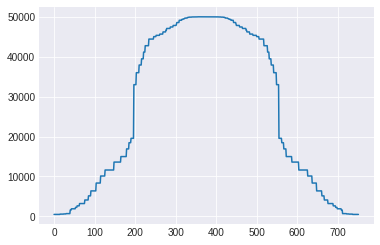

In [0]:
cured_mirror = np.concatenate((z, rev))
cured_mirror
#though it seems that this curve is for the recovered people beacuse of its name,
#its actually the profile for the infected people
plt.plot(cured_mirror)

Above graph is for the confirmed people

Creating new time observations from 2020-03-19 to 2020-08-26 with 376 observations

In [0]:
new_updateTime = pd.Series(pd.date_range(start='2020-03-19', end='2020-08-26', periods=376))
new_updateTime

0     2020-03-19 00:00:00
1     2020-03-19 10:14:24
2     2020-03-19 20:28:48
3     2020-03-20 06:43:12
4     2020-03-20 16:57:36
              ...        
371   2020-08-24 07:02:24
372   2020-08-24 17:16:48
373   2020-08-25 03:31:12
374   2020-08-25 13:45:36
375   2020-08-26 00:00:00
Length: 376, dtype: datetime64[ns]

In [0]:
v= wuhan_current.city_recoveredCount
type(v)
v_list= v.to_numpy()

In [0]:
import scipy as sp

Converting the date time into float to align it with the recovered population. Which is further used to extrapolate the recovered population over the new time period

In [0]:
import datetime
def datetime_to_float(d):
    epoch = datetime.datetime.utcfromtimestamp(0)
    total_seconds =  (d - epoch).total_seconds()
    return total_seconds

In [0]:
i=0
newupdateTime = []
for d in new_updateTime:
    dt = datetime_to_float(d)
    i+=1
    newupdateTime.append(dt)

In [0]:
newupdateTime

[1584576000.0,
 1584612864.0,
 1584649728.0,
 1584686592.0,
 1584723456.0,
 1584760320.0,
 1584797184.0,
 1584834048.0,
 1584870912.0,
 1584907776.0,
 1584944640.0,
 1584981504.0,
 1585018368.0,
 1585055232.0,
 1585092096.0,
 1585128960.0,
 1585165824.0,
 1585202688.0,
 1585239552.0,
 1585276416.0,
 1585313280.0,
 1585350144.0,
 1585387008.0,
 1585423872.0,
 1585460736.0,
 1585497600.0,
 1585534464.0,
 1585571328.0,
 1585608192.0,
 1585645056.0,
 1585681920.0,
 1585718784.0,
 1585755648.0,
 1585792512.0,
 1585829376.0,
 1585866240.0,
 1585903104.0,
 1585939968.0,
 1585976832.0,
 1586013696.0,
 1586050560.0,
 1586087424.0,
 1586124288.0,
 1586161152.0,
 1586198016.0,
 1586234880.0,
 1586271744.0,
 1586308608.0,
 1586345472.0,
 1586382336.0,
 1586419200.0,
 1586456064.0,
 1586492928.0,
 1586529792.0,
 1586566656.0,
 1586603520.0,
 1586640384.0,
 1586677248.0,
 1586714112.0,
 1586750976.0,
 1586787840.0,
 1586824704.0,
 1586861568.0,
 1586898432.0,
 1586935296.0,
 1586972160.0,
 158700902

In [0]:
u =covid19_wuhan.updateTime.sort_values()

In [0]:
import pandas as pd
from datetime import datetime

covidDataChinaUpdatedTime = u
covidDataChinaUpdatedTime = pd.DataFrame(covidDataChinaUpdatedTime)

#list conversion of updateTime
aa = covidDataChinaUpdatedTime.updateTime.to_list()

converted = []

for i in range(len(aa)):
    spaceSep = aa[i].split(" ")
    colSep = spaceSep[1].split(":")
    deshSep = spaceSep[0].split("-")
    intColSep = [int(col) for col in colSep]
    intDeshSep = [int(desh) for desh in deshSep]
    val = datetime(intDeshSep[0],intDeshSep[1],intDeshSep[2],intColSep[0],intColSep[1],intColSep[2]).timestamp()
    converted.append(val)

converted


[1579859258.0,
 1579859319.0,
 1579859379.0,
 1579859440.0,
 1579866588.0,
 1579868586.0,
 1579868647.0,
 1579870273.0,
 1579871728.0,
 1579871788.0,
 1579872152.0,
 1579882277.0,
 1579884481.0,
 1579887009.0,
 1579938520.0,
 1579939428.0,
 1579939731.0,
 1579939860.0,
 1579939923.0,
 1579940044.0,
 1579982770.0,
 1579982831.0,
 1579996535.0,
 1579996899.0,
 1580029097.0,
 1580032424.0,
 1580046210.0,
 1580046332.0,
 1580046635.0,
 1580109001.0,
 1580109062.0,
 1580109122.0,
 1580109183.0,
 1580109304.0,
 1580109425.0,
 1580109485.0,
 1580110332.0,
 1580138119.0,
 1580138179.0,
 1580143377.0,
 1580202297.0,
 1580226209.0,
 1580229377.0,
 1580280025.0,
 1580280085.0,
 1580282199.0,
 1580287759.0,
 1580313385.0,
 1580330023.0,
 1580330084.0,
 1580344110.0,
 1580344231.0,
 1580345138.0,
 1580368402.0,
 1580369610.0,
 1580370033.0,
 1580423077.0,
 1580455256.0,
 1580455588.0,
 1580504623.0,
 1580505334.0,
 1580505404.0,
 1580508401.0,
 1580545186.0,
 1580545433.0,
 1580549649.0,
 158055325

Linearly extrapolating the data according to the current statistics. The extrapolated data is till August

In [0]:
fvlinear = sp.interpolate.interp1d(converted, v, kind = 'linear',fill_value = 'extrapolate')
tnew = newupdateTime
vlinear = fvlinear(tnew)

In [0]:
b =np.concatenate((v_list, vlinear))
len(b)

752

In [0]:
a = converted+newupdateTime
a

[1579859258.0,
 1579859319.0,
 1579859379.0,
 1579859440.0,
 1579866588.0,
 1579868586.0,
 1579868647.0,
 1579870273.0,
 1579871728.0,
 1579871788.0,
 1579872152.0,
 1579882277.0,
 1579884481.0,
 1579887009.0,
 1579938520.0,
 1579939428.0,
 1579939731.0,
 1579939860.0,
 1579939923.0,
 1579940044.0,
 1579982770.0,
 1579982831.0,
 1579996535.0,
 1579996899.0,
 1580029097.0,
 1580032424.0,
 1580046210.0,
 1580046332.0,
 1580046635.0,
 1580109001.0,
 1580109062.0,
 1580109122.0,
 1580109183.0,
 1580109304.0,
 1580109425.0,
 1580109485.0,
 1580110332.0,
 1580138119.0,
 1580138179.0,
 1580143377.0,
 1580202297.0,
 1580226209.0,
 1580229377.0,
 1580280025.0,
 1580280085.0,
 1580282199.0,
 1580287759.0,
 1580313385.0,
 1580330023.0,
 1580330084.0,
 1580344110.0,
 1580344231.0,
 1580345138.0,
 1580368402.0,
 1580369610.0,
 1580370033.0,
 1580423077.0,
 1580455256.0,
 1580455588.0,
 1580504623.0,
 1580505334.0,
 1580505404.0,
 1580508401.0,
 1580545186.0,
 1580545433.0,
 1580549649.0,
 158055325

In [0]:
time = np.array(a)
time
len(time)

752

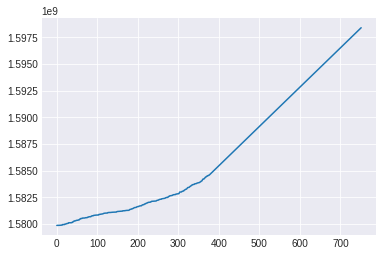

In [0]:
plt.plot(time)

The final data frame we are going to work on:

In [0]:
zz= pd.DataFrame({ 'city_recoveredCount':  b,
                  'city_confirmed': cured_mirror ,
                  'updateTime': a})

In [0]:
zz = zz.set_index('updateTime')

Here we are considering the update time to be in float(epochs to a certain reference) as it suited our datatype in the extrapolated values

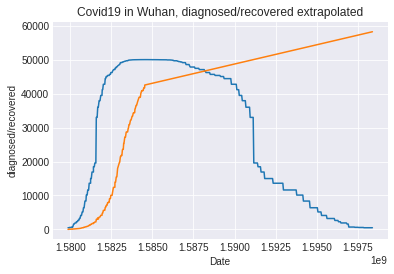

In [0]:
plt.plot(zz.city_confirmed)
plt.plot(zz.city_recoveredCount)

plt.title('Covid19 in Wuhan, diagnosed/recovered extrapolated')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

Reducing the size of our data by an order of magnitude:

In [0]:
zz1 = zz[::30]

In [0]:
zz1

,city_recoveredCount,city_confirmed
updateTime,,
1.579859e+09,0.000000,495.0
1.580109e+09,105.000000,698.0
1.580505e+09,254.000000,2639.0
1.580766e+09,493.000000,5142.0
1.581011e+09,864.000000,10117.0
1.581167e+09,1243.000000,13603.0
1.581352e+09,1727.000000,16902.0
1.581752e+09,3625.000000,37914.0
1.582132e+09,6466.000000,44412.0


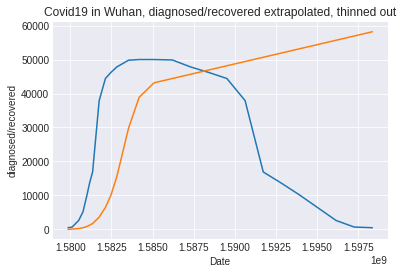

In [0]:
plt.plot(zz1.city_confirmed)
plt.plot(zz1.city_recoveredCount)

plt.title('Covid19 in Wuhan, diagnosed/recovered extrapolated, thinned out')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

Renormalize so that all values are less than 1, with the number of recovered people slowly reaching 100%.

In [0]:
normalized_zz1=(zz1-zz1.min())/(zz1.max()-zz1.min())

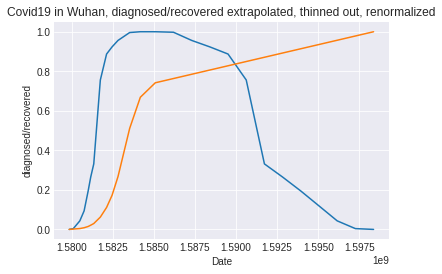

In [0]:
plt.plot(normalized_zz1.city_confirmed)
plt.plot(normalized_zz1.city_recoveredCount)

plt.title('Covid19 in Wuhan, diagnosed/recovered extrapolated, thinned out, renormalized')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

In [0]:
y_wuhan4 = normalized_zz1.city_recoveredCount 

In [0]:
y_wuhan5 = normalized_zz1.to_numpy()


In [0]:
y_wuhan5

array([[0.        , 0.        ],
       [0.00180487, 0.00410101],
       [0.00436607, 0.04331313],
       [0.00847431, 0.09387879],
       [0.01485153, 0.19438384],
       [0.02136626, 0.26480808],
       [0.02968586, 0.33145455],
       [0.06231109, 0.75593939],
       [0.1111458 , 0.88721212],
       [0.17261461, 0.92335354],
       [0.26774002, 0.95614141],
       [0.5113463 , 0.996     ],
       [0.6686109 , 1.        ],
       [0.7417896 , 1.        ],
       [0.76330713, 0.99749495],
       [0.78482467, 0.95614141],
       [0.8063422 , 0.92335354],
       [0.82785973, 0.88721212],
       [0.84937727, 0.75593939],
       [0.8708948 , 0.33145455],
       [0.89241233, 0.26480808],
       [0.91392987, 0.19438384],
       [0.9354474 , 0.1189697 ],
       [0.95696493, 0.04331313],
       [0.97848247, 0.00410101],
       [1.        , 0.        ]])

In [0]:
y_wuhan5[0,1]

0.001

Without the fudge below, the NUTS sim will probably crash out with Bad Initial Energy error!

In [0]:
y_wuhan5[0,1] = 0.0010
y_wuhan5

array([[0.        , 0.001     ],
       [0.00180487, 0.00410101],
       [0.00436607, 0.04331313],
       [0.00847431, 0.09387879],
       [0.01485153, 0.19438384],
       [0.02136626, 0.26480808],
       [0.02968586, 0.33145455],
       [0.06231109, 0.75593939],
       [0.1111458 , 0.88721212],
       [0.17261461, 0.92335354],
       [0.26774002, 0.95614141],
       [0.5113463 , 0.996     ],
       [0.6686109 , 1.        ],
       [0.7417896 , 1.        ],
       [0.76330713, 0.99749495],
       [0.78482467, 0.95614141],
       [0.8063422 , 0.92335354],
       [0.82785973, 0.88721212],
       [0.84937727, 0.75593939],
       [0.8708948 , 0.33145455],
       [0.89241233, 0.26480808],
       [0.91392987, 0.19438384],
       [0.9354474 , 0.1189697 ],
       [0.95696493, 0.04331313],
       [0.97848247, 0.00410101],
       [1.        , 0.        ]])

In [0]:
y_wuhan5.shape

(26, 2)

## Bayesian modeling Chinese stats

In [0]:
# !pip uninstall pymc3

In [0]:
pip install git+https://github.com/pymc-devs/pymc3

  Cloning https://github.com/pymc-devs/pymc3 to /tmp/pip-req-build-0_87y1ef
  Running command git clone -q https://github.com/pymc-devs/pymc3 /tmp/pip-req-build-0_87y1ef
     |████████████████████████████████| 102kB 4.2MB/s 
  Created wheel for pymc3: filename=pymc3-3.8-cp36-none-any.whl size=41692495 sha256=082f75d67322506bcea71744281a02256b3b06bc5522cfc0a55607194106c90a
  Stored in directory: /tmp/pip-ephem-wheel-cache-iq983xmb/wheels/a1/e3/71/a696f2af0dd40bccc0ce672d616d21cc9dd90dbdd3f03242f4
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=29fca61180d99d5c4d7e93fe59d20ce7387591d553cb7ec91ff25c691e4e6046
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built pymc3 contextvars
ERROR: chainer 6.5.0 has requirement typing-extensions<=3.6.6, but you'll have typing-extensions 3.7.4.2 which is incompatible.
  Found existing installation: typing-extensions 3.6.6
    Uninstalli

In [0]:
import numpy as np
import pymc3 as pm
pm.__version__
# from pymc3.ode import DifferentialEquation
# import theano

'3.8'

In [0]:
from pymc3.ode import DifferentialEquation
import theano

Matching shapes for X and Y:

In [0]:
np.arange(0.25, 5, 0.00662).shape

(718,)

In [0]:
np.arange( 0.25, 5, 0.25).shape

(19,)

In [0]:
np.arange(0.25, 5.40, 0.2).shape

(26,)

In [0]:
sir_model = DifferentialEquation(
    func = SIR,
    times = np.arange(0.25, 5.40, 0.2),
    n_states = 2,
    n_theta = 2,
    t0 = 0,
)

We will model observations with a log-normal distribution, a continuous probability density function (pdf) whose logarithm is normally distributed. Thus, if the random variable X is log-normally distributed, then Y = ln(X) has a normal distribution.

Taking the logarithm of a dataset is a big-time prettyfier of data and is often a first target model. So we will assume that our Chinese I (infected) and R (recovered) data are log-normally distributed. We will add dead people to the recovered population since that is how we built our infectious model above.

We will assume that there is noise/error in the Chinese data, so we will tack on a standard deviation. Since that quantity is never negative, it is often modelled as a Half Cauchy distribution.

To model the parameters themselves, we will assume a very uninformative  𝑅0  that is just  >1  so that we have an epidemic, a  𝛾  that also follows a log-normal distribution (so we only use one pdf type for our model, but hey, you're free to try another one!), and a  𝛽  that is deterministically given by  𝛾∗𝑅0 .

The data whose likelihood we're trying to model is given by the sir_model above: our function SIR given even further above, a time discretization from 0.25 to 5, starting from time 0, with 2D data (I, R) for Wuhan and 2D parameters (R0 and gama). We pick Wuhan because it gives us the worst possible case since it's the epicenter of the disease.

In [0]:
import arviz as az

with pm.Model() as model9:
    sigma = pm.HalfCauchy('sigma', 1, shape=2)

    # R0 is bounded below by 1 because we see an epidemic has occured
    R0 = pm.Bound(pm.Normal, lower=1)('R0', 2, 3)
    gama = pm.Lognormal('gama', pm.math.log(2), 2)
    beta = pm.Deterministic('beta', gama*R0)

    sir_curves = sir_model(y0=[0.01, 0.0], theta=[beta, gama])

    # data likelihood
    Y = pm.Lognormal('Y', mu=pm.math.log(sir_curves), sd=sigma, observed=y_wuhan5)

    prior = pm.sample_prior_predictive()
    trace = pm.sample(2000, tune=1000, target_accept=0.9, cores=1)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [gama, R0, sigma]


SamplingError: ignored